### Data Source

The Consumer Complaint Database [https://www.consumerfinance.gov/data-research/consumer-complaints/search/?from=0&searchField=all&searchText=&size=25&sort=created_date_desc  ] from Consumer Financial Protection Bureau.

I downloaded the data on May 16, 2019. 
"complaints-2019-05-16_13_17.csv" file contains complaints with narratives. 383,958 records.
"Consumer_Complaints.csv" file contains all complaints with those records with no narratives. 1,285,487 complaints.  

Discription of the columns of the data.
https://www.consumerfinance.gov/complaint/data-use/

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [33]:
#complaints = pd.read_csv('data/Consumer_Complaints.csv')
complaints = pd.read_csv("data/complaints-2019-05-16_13_17.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
pp.ProfileReport(complaints)

Number of variables,18
Number of observations,383958
Total Missing (%),3.2%
Total size in memory,52.7 MiB
Average record size in memory,144.0 B
Numeric,1
Categorical,15
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [15]:
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [73]:
complaints.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
383953,03/19/15,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,This company continues to report on my credit ...,None,"Pinnacle Credit Services, LLC",TX,775XX,None,Consent provided,Web,03/19/15,Closed with explanation,Yes,No,1291553
383954,03/19/15,Credit card,None,Other,None,Mel S. Harris & assoc. used deceptive collecti...,None,"Mel S. Harris and Associates, LLC",NY,140XX,Older American,Consent provided,Web,04/01/15,Closed with explanation,Yes,No,1290606
383955,03/19/15,Credit card,None,Other,None,Citibank is calling and harassing me. I do not...,Company chooses not to provide a public response,"CITIBANK, N.A.",PA,None,None,Consent provided,Web,03/19/15,Closed with non-monetary relief,Yes,No,1291855
383956,03/19/15,Credit reporting,None,Incorrect information on credit report,Account terms,Why is this account in my credit report? It wa...,None,"EQUIFAX, INC.",MD,210XX,Servicemember,Consent provided,Web,03/19/15,Closed with explanation,Yes,No,1290244
383957,03/19/15,Debt collection,I do not know,Improper contact or sharing of info,Contacted me after I asked not to,Keeps calling even after I told them we do not...,Company chooses not to provide a public response,United Consumers Inc,NC,None,Older American,Consent provided,Web,03/26/15,Closed with explanation,Yes,No,1290851


### Check NaN in columns

In [19]:
col_num = complaints.shape[1]
for i in np.arange(col_num):
    print(complaints.iloc[:, i].dtype)
    if complaints.iloc[:, i].isnull:
        print("Column {}: {} contains Nan.".format(i, complaints.columns.values[i]))

object
Column 0: Date received contains Nan.
object
Column 1: Product contains Nan.
object
Column 2: Sub-product contains Nan.
object
Column 3: Issue contains Nan.
object
Column 4: Sub-issue contains Nan.
object
Column 5: Consumer complaint narrative contains Nan.
object
Column 6: Company public response contains Nan.
object
Column 7: Company contains Nan.
object
Column 8: State contains Nan.
object
Column 9: ZIP code contains Nan.
object
Column 10: Tags contains Nan.
object
Column 11: Consumer consent provided? contains Nan.
object
Column 12: Submitted via contains Nan.
object
Column 13: Date sent to company contains Nan.
object
Column 14: Company response to consumer contains Nan.
object
Column 15: Timely response? contains Nan.
object
Column 16: Consumer disputed? contains Nan.
int64
Column 17: Complaint ID contains Nan.


### Look at the unique values for each column

In [8]:
col_num = complaints.shape[1]
for i in np.arange(col_num):
    print("Column {}: Values of \"{}\"".format(i, complaints.columns.values[i]))
    print("Number of unique values {}".format(len(complaints.iloc[:,i].unique())))
    #print(complaints.iloc[:,i].unique())

Column 0: Values of "Date received"
Number of unique values 1970
Column 1: Values of "Product"
Number of unique values 13
Column 2: Values of "Sub-product"
Number of unique values 51
Column 3: Values of "Issue"
Number of unique values 99
Column 4: Values of "Sub-issue"
Number of unique values 62
Column 5: Values of "Consumer complaint narrative"
Number of unique values 160983
Column 6: Values of "Company public response"
Number of unique values 11
Column 7: Values of "Company"
Number of unique values 4290
Column 8: Values of "State"
Number of unique values 63
Column 9: Values of "ZIP code"
Number of unique values 18935
Column 10: Values of "Tags"
Number of unique values 4
Column 11: Values of "Consumer consent provided?"
Number of unique values 5
Column 12: Values of "Submitted via"
Number of unique values 6
Column 13: Values of "Date sent to company"
Number of unique values 2049
Column 14: Values of "Company response to consumer"
Number of unique values 8
Column 15: Values of "Timely 

### Remove Nan in "Consumer disputed?"
These data are not labeled yet. We can not use these data to train and validate

In [35]:
complaints = complaints.dropna(subset=["Consumer disputed?"])

In [36]:
len(complaints)

164076

In [5]:
print("Number of complaints with narrative", len(complaints.dropna(subset=["Consumer complaint narrative"])))

Number of complaints with narrative 164076


### Count each subject

### See the number of complaints if removing all nan fields

In [37]:
temp = complaints
print(len(temp))
print("Complaints number with all fields filled is {}.".format(len(temp.dropna())))

164076
Complaints number with all fields filled is 164076.


### Check nan number in each column

In [34]:
col_num = len(complaints.columns)
for i in np.arange(col_num):
    col_name = complaints.columns[i]
    na_num = np.sum(complaints[col_name].isna())
    print("Number of Na in column {} is {}.".format(col_name, na_num))

Number of Na in column Date received is 0.
Number of Na in column Product is 0.
Number of Na in column Sub-product is 235166.
Number of Na in column Issue is 0.
Number of Na in column Sub-issue is 455416.
Number of Na in column Consumer complaint narrative is 604425.
Number of Na in column Company public response is 572792.
Number of Na in column Company is 0.
Number of Na in column State is 5651.
Number of Na in column ZIP code is 46569.
Number of Na in column Tags is 660542.
Number of Na in column Consumer consent provided? is 470584.
Number of Na in column Submitted via is 0.
Number of Na in column Date sent to company is 0.
Number of Na in column Company response to consumer is 1.
Number of Na in column Timely response? is 0.
Number of Na in column Consumer disputed? is 0.
Number of Na in column Complaint ID is 0.


## Check columns not to be used in the data
Check columns to see whether they have effect on classification.

### Find whether there are multiple complaints submitted by same user

In [48]:
complaints.groupby("Complaint ID").count()["Issue"].max()

1

There is no complaints submitted by same user. We don't need this column. 
But the column is the only column containing no na value, which is useful for counting.

### Check whether we need Tags column

In [51]:
complaints.groupby("Tags").count()["Issue"]

Tags
Older American                   77094
Older American, Servicemember    14034
Servicemember                    84916
Name: Issue, dtype: int64

In [54]:
complaints["Tags"].isna().sum()

1109443

There is a lot of Nan in this field. I am not sure whether the "older American, and serciemember" tag could cause some discrimitive issue.  May be not use "Tags" column for now. 

### Check the number of dispute of top 20 companies

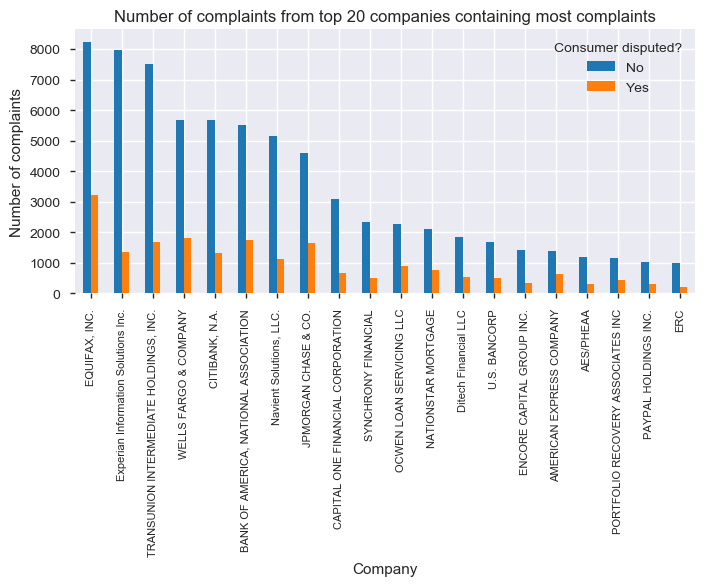

In [62]:
dispute_by_company = complaints.groupby(["Company", "Consumer disputed?"]).count()["Complaint ID"].unstack().sort_values(by=["No"], ascending=False)
dispute_by_top_company = dispute_by_company[0:20]
dispute_by_top_company.plot.bar()
plt.ylabel("Number of complaints")
plt.xticks(fontsize=8)
plt.title("Number of complaints from top 20 companies containing most complaints")
plt.gcf().subplots_adjust(bottom=0.4)
plt.savefig("figs/top20_company.png")

It can be seen that "Experian Information Solutions Inc" has better strategy of dealing with complaints. Although it contains more complaints than the following two companies, it contains far less disputed ones.  Let's have a look of the dispute ratio within this top 20 companies.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


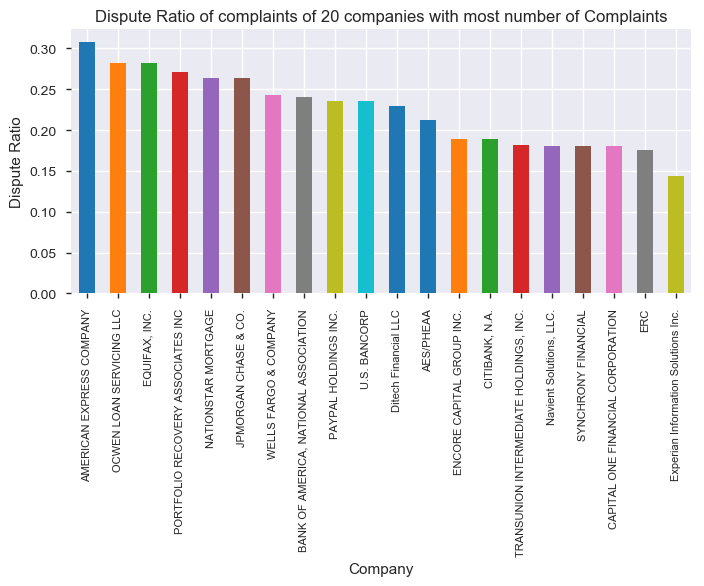

In [65]:
dispute_by_top_company["dispute_ratio"] = dispute_by_top_company["Yes"] / (dispute_by_top_company["Yes"] + dispute_by_top_company["No"])
dispute_ratio_by_top_company = dispute_by_top_company["dispute_ratio"].sort_values(ascending=False)
dispute_ratio_by_top_company.plot.bar()
plt.xticks(fontsize=8)
plt.gcf().subplots_adjust(bottom=0.4)
plt.title("Dispute Ratio of complaints of 20 companies with most number of Complaints")
plt.ylabel("Dispute Ratio")
plt.savefig("figs/dispute_ratio_of_top20_company.png")

It can tell that "Experian Information Solutions Inc." do has the smallest dispute rate although its complaint number is top 3.  It's strategy of dealing with complaints deserve research.

### Examine complaints especially to "Experian Information Solutions Inc" company
In the previous two graph, the "Experian Information Solutions Inc" company contains the lowest dispute ratio while top 3 complaints number.  Let's extract its data.

In [40]:
experian_complaints = complaints[complaints["Company"] == "Experian Information Solutions Inc."]
len(experian_complaints)

9307

### Check whether "Company public response" related to whether dispute or not

In [41]:
complaints.groupby(["Company public response", "Consumer disputed?"]).count()

Date received  \
Company public response                            Consumer disputed?                  
Company believes complaint caused principally b... No                           1047   
                                                   Yes                           174   
Company believes complaint is the result of an ... No                           1041   
                                                   Yes                           148   
Company believes complaint relates to a discont... No                             16   
                                                   Yes                             4   
Company believes complaint represents an opport... No                            502   
                                                   Yes                            81   
Company believes it acted appropriately as auth... No                          11405   
                                                   Yes                          3782   
Company believes the complaint is the result of... No                           1255   
                                                   Yes                           257   
Company can't verify or dispute the facts in th... No                            547   
                                                   Yes                           152   
Company chooses not to provide a public response   No                          15384   
                                                   Yes                          4434   
Company disputes the facts presented in the com... No                           1054   
                                                   Yes                           414   
Company has responded to the consumer and the C... No                          29557   
                                                   Yes                          6868   
None                                               No                          66461   
                                                   Yes                         19493   

                                                                       Product  \
Company public response                            Consumer disputed?            
Company believes complaint caused principally b... No                     1047   
                                                   Yes                     174   
Company believes complaint is the result of an ... No                     1041   
                                                   Yes                     148   
Company believes complaint relates to a discont... No                       16   
                                                   Yes                       4   
Company believes complaint represents an opport... No                      502   
                                                   Yes                      81   
Company believes it acted appropriately as auth... No                    11405   
                                                   Yes                    3782   
Company believes the complaint is the result of... No                     1255   
                                                   Yes                     257   
Company can't verify or dispute the facts in th... No                      547   
                                                   Yes                     152   
Company chooses not to provide a public response   No                    15384   
                                                   Yes                    4434   
Company disputes the facts presented in the com... No                     1054   
                                                   Yes                     414   
Company has responded to the consumer and the C... No                    29557   
                                                   Yes                    6868   
None                                               No                    66461   
                                                   Yes                  

Text(0.5, 1.0, 'The bar chart of complaints number with different Company public response.')

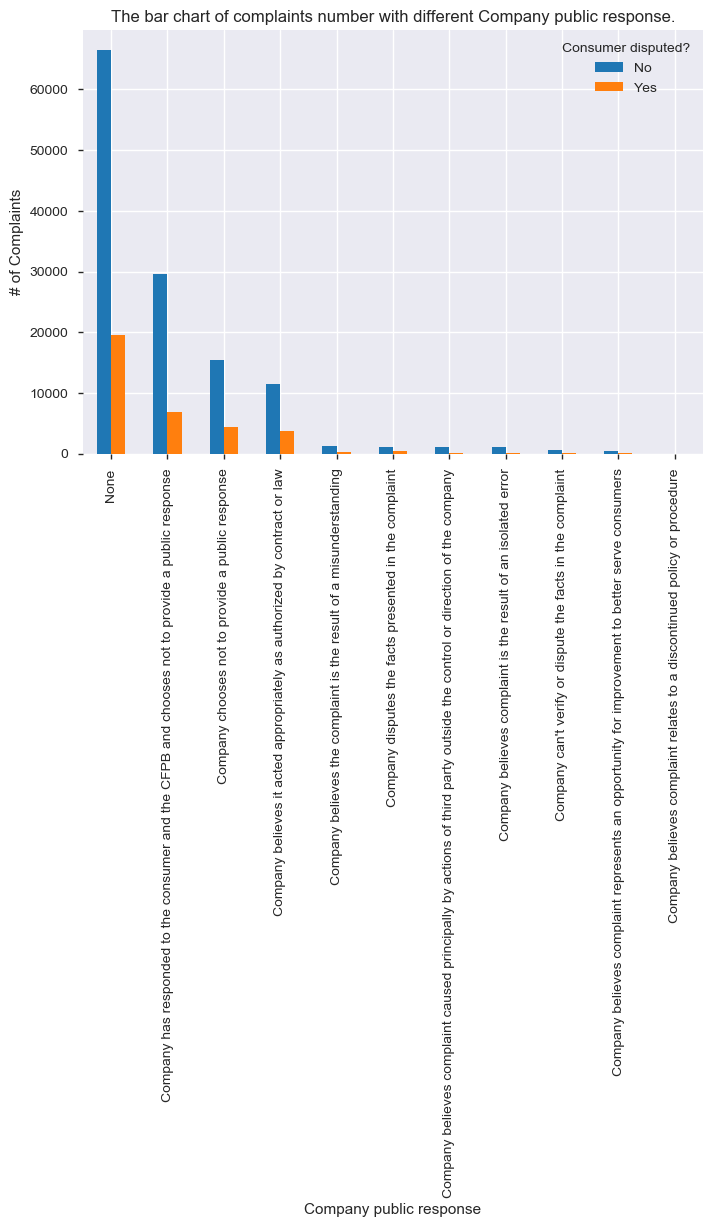

In [42]:
public_response_to_dispute = complaints.groupby(["Company public response", "Consumer disputed?"]).count()["Complaint ID"].unstack()
public_response_to_dispute = public_response_to_dispute.sort_values(by=["No"], ascending=False)
public_response_to_dispute.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company public response.")

### Do the same to Experin company

Text(0.5, 1.0, 'The bar chart of complaints number with different Company public response by Experian.')

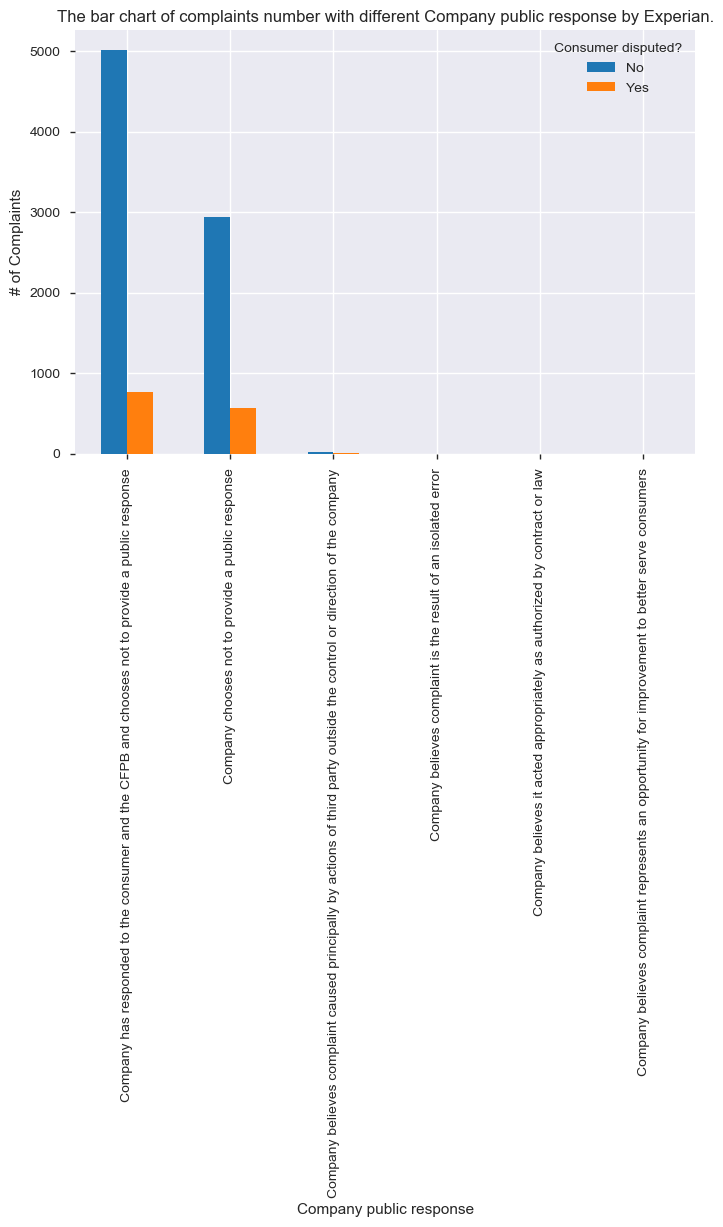

In [43]:
experian_complaints.groupby(["Company public response", "Consumer disputed?"]).count()

experian_public_response_to_dispute = experian_complaints.groupby(["Company public response", "Consumer disputed?"]).count()["Complaint ID"].unstack()
experian_public_response_to_dispute = experian_public_response_to_dispute.sort_values(by=["No"], ascending=False)
experian_public_response_to_dispute.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company public response by Experian.")

### Check how the "Company response to consumer" is related to "related to whether dispute or not".

In [44]:
complaints.groupby(["Company response to consumer", "Consumer disputed?"]).count()

Date received  Product  \
Company response to consumer    Consumer disputed?                           
Closed                          No                           2751     2751   
                                Yes                           990      990   
Closed with explanation         No                          97323    97323   
                                Yes                         31122    31122   
Closed with monetary relief     No                          10214    10214   
                                Yes                          1308     1308   
Closed with non-monetary relief No                          16891    16891   
                                Yes                          2387     2387   
None                            No                              1        1   
Untimely response               No                           1089     1089   

                                                    Sub-product  Issue  \
Company response to consumer    Consumer disputed?                       
Closed                          No                         2751   2751   
                                Yes                         990    990   
Closed with explanation         No                        97323  97323   
                                Yes                       31122  31122   
Closed with monetary relief     No                        10214  10214   
                                Yes                        1308   1308   
Closed with non-monetary relief No                        16891  16891   
                                Yes                        2387   2387   
None                            No                            1      1   
Untimely response               No                         1089   1089   

                                                    Sub-issue  \
Company response to consumer    Consumer disputed?              
Closed                          No                       2751   
                                Yes                       990   
Closed with explanation         No                      97323   
                                Yes                     31122   
Closed with monetary relief     No                      10214   
                                Yes                      1308   
Closed with non-monetary relief No                      16891   
                                Yes                      2387   
None                            No                          1   
Untimely response               No                       1089   

                                                    Consumer complaint narrative  \
Company response to consumer    Consumer disputed?                                 
Closed                          No                                          2751   
                                Yes                                          990   
Closed with explanation         No                                         97323   
                                Yes                                        31122   
Closed with monetary relief     No                                         10214   
                                Yes                                         1308   
Closed with non-monetary relief No                                         16891   
                                Yes                                         2387   
None                            No                                             1   
Untimely response               No                                          1089   

                                                    Company public response  \
Company response to consumer    Consumer disputed?                            
Closed                          No                                     2751   
                                Yes                                     990   
Closed with explanation         No                                    97323   
                                Yes      

Text(0.5, 1.0, 'The bar chart of complaints number with different Company response to consumer.')

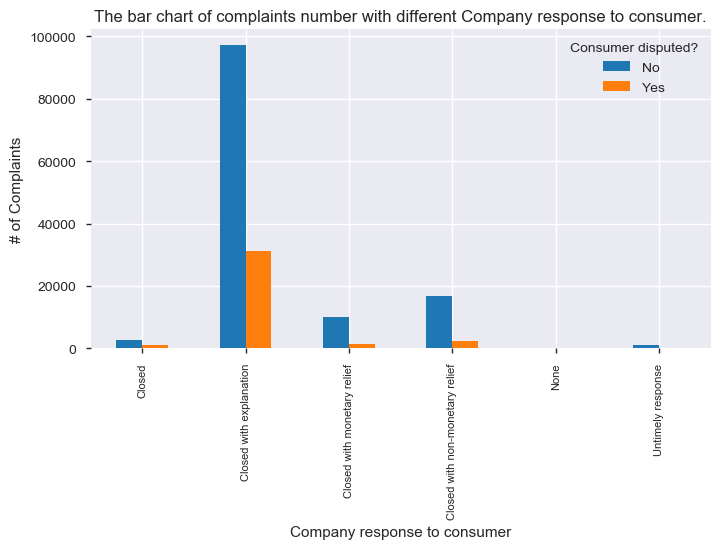

In [45]:
response_to_disputed = complaints.groupby(["Company response to consumer", "Consumer disputed?"]).count()["Complaint ID"].unstack()
#repsonse_to_disputed = response_to_disputed.sort_values(by=["No"], ascending=False)
response_to_disputed.plot.bar()
plt.ylabel("# of Complaints")
plt.xticks(fontsize=8)
plt.gcf().subplots_adjust(bottom=0.3)
plt.title("The bar chart of complaints number with different Company response to consumer.")

### Check the strategy of Experian Information Inc.

Text(0.5, 1.0, 'The bar chart of complaints number with different Company response to consumer by Experian Information Inc.')

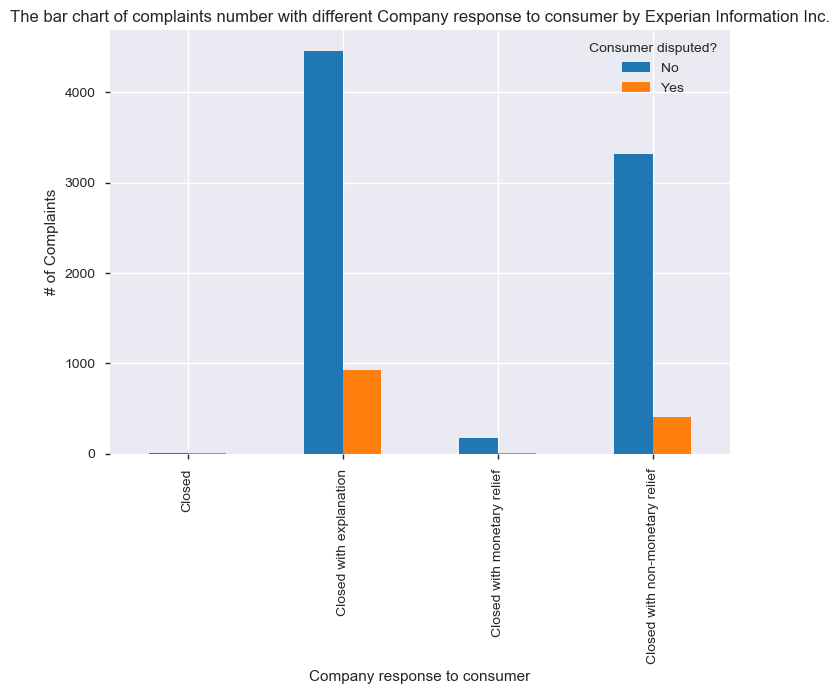

In [46]:
response_to_disputed = experian_complaints.groupby(["Company response to consumer", "Consumer disputed?"]).count()["Complaint ID"].unstack()
#repsonse_to_disputed = response_to_disputed.sort_values(by=["No"], ascending=False)
response_to_disputed.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company response to consumer by Experian Information Inc.")

### Check the dispute distribution of each Product

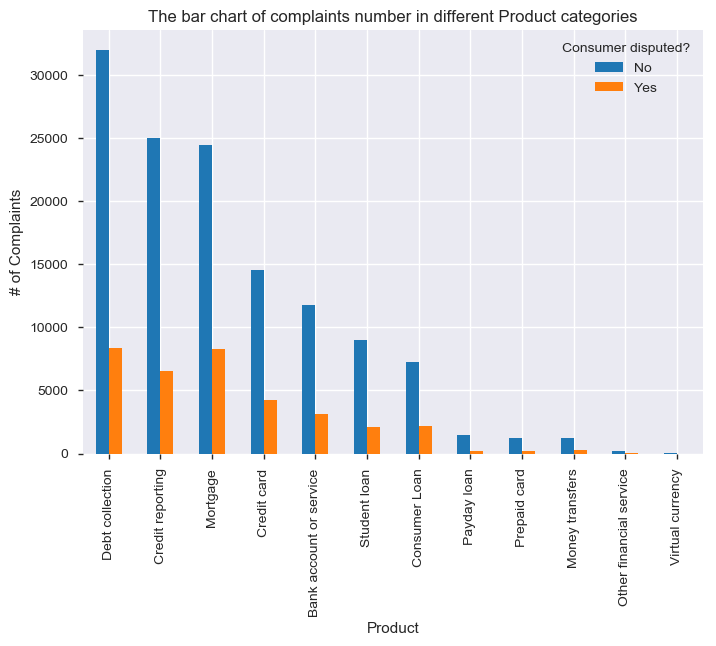

In [72]:
dispute_by_product = complaints.groupby(["Product", "Consumer disputed?"]).count()["Complaint ID"].unstack()
dispute_by_product = dispute_by_product.sort_values(by=["No"], ascending=False)
dispute_by_product.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number in different Product categories")
plt.savefig("figs/complaints_each_Product_category.png")

### Check the dispute distribution of each Issue type

In [71]:
print("number of different issues: " + str(len(complaints["Issue"].unique())))
#complaints["Issue"].value_counts()
      

number of different issues: 91


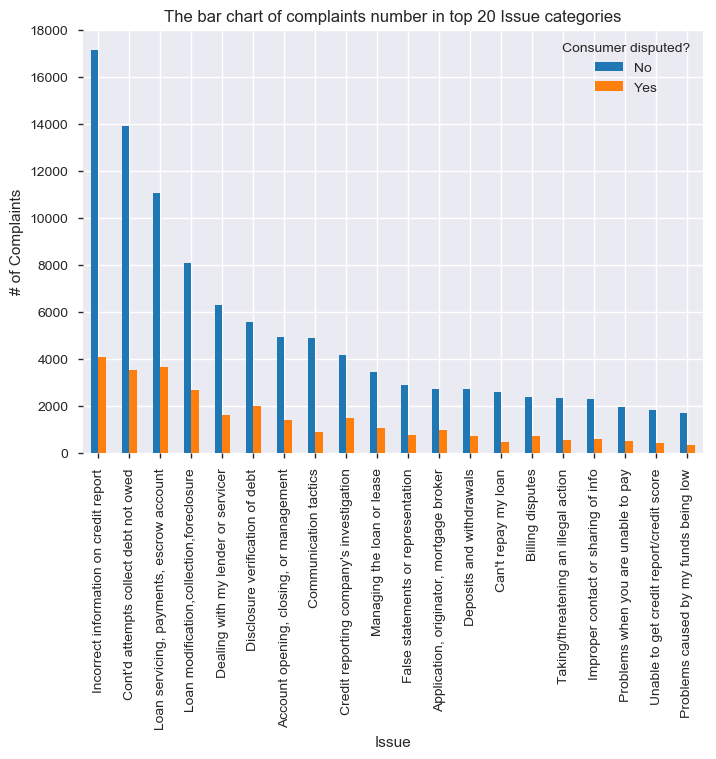

In [66]:
dispute_by_issue = complaints.groupby(["Issue", "Consumer disputed?"]).count()["Complaint ID"].unstack()
dispute_by_issue = dispute_by_issue.sort_values(by=["No"], ascending=False)
dispute_by_issue[:20].plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number in top 20 Issue categories")
plt.savefig("figs/complaints_of_top20_Issues.png")

### Check different issue type in each produce

In [58]:
issue_type_in_product = complaints.groupby(["Product","Issue"]).count()["Complaint ID"].unstack()
issue_type_in_product.head()

Issue,APR or interest rate,"Account opening, closing, or management",Account terms and changes,Adding money,Advertising and marketing,"Advertising, marketing or disclosures",Application processing delay,"Application, originator, mortgage broker",Applied for loan/did not receive money,Arbitration,...,Shopping for a loan or lease,Taking out the loan or lease,Taking/threatening an illegal action,Transaction issue,Unable to get credit report/credit score,Unauthorized transactions/trans. issues,Unexpected/Other fees,Unsolicited issuance of credit card,Using a debit or ATM card,Wrong amount charged or received
Product,,,,,,,,,,,,,,,,,,,,,
Bank account or service,NaN,6347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1597.0,NaN
Consumer Loan,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,...,662.0,1561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit card,785.0,NaN,NaN,NaN,818.0,NaN,107.0,NaN,NaN,83.0,...,NaN,NaN,NaN,681.0,NaN,NaN,NaN,491.0,NaN,NaN
Credit reporting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2252.0,NaN,NaN,NaN,NaN,NaN
Debt collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
